In [1]:
import json
import pandas as pd
import numpy as np
import re
import requests
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
url = "https://data.nashville.gov/resource/7qhx-rexh.json?$where=case_subrequest=='COVID-19 Violations'&$limit=15000"

response = requests.get(url)

In [3]:
response.json()

[{'case_number': '501337',
  'status': 'Closed',
  'case_request': 'COVID-19',
  'case_subrequest': 'COVID-19 Violations',
  'additional_subrequest': 'COVID-19 Violations',
  'date_time_opened': '2020-11-12T19:35:01.000',
  'date_time_closed': '2020-11-13T15:31:57.000',
  'case_origin': 'hubNashville Community',
  'state_issue': 'False',
  'closed_when_created': 'False',
  'incident_address': '114 George L Davis Blvd',
  'incident_city': 'NASHVILLE',
  'incident_council_district': '19',
  'incident_zip_code': '37203',
  'latitude': '36.15702616160435',
  'longitude': '-86.7892250932541',
  'mapped_location': {'latitude': '36.15702616160435',
   'longitude': '-86.7892250932541'}},
 {'case_number': '501127',
  'status': 'Closed',
  'case_request': 'COVID-19',
  'case_subrequest': 'COVID-19 Violations',
  'additional_subrequest': 'COVID-19 Violations',
  'date_time_opened': '2020-11-12T17:41:13.000',
  'date_time_closed': '2020-11-13T15:37:11.000',
  'case_origin': 'Phone',
  'state_issue

In [4]:
response.json()[0]

{'case_number': '501337',
 'status': 'Closed',
 'case_request': 'COVID-19',
 'case_subrequest': 'COVID-19 Violations',
 'additional_subrequest': 'COVID-19 Violations',
 'date_time_opened': '2020-11-12T19:35:01.000',
 'date_time_closed': '2020-11-13T15:31:57.000',
 'case_origin': 'hubNashville Community',
 'state_issue': 'False',
 'closed_when_created': 'False',
 'incident_address': '114 George L Davis Blvd',
 'incident_city': 'NASHVILLE',
 'incident_council_district': '19',
 'incident_zip_code': '37203',
 'latitude': '36.15702616160435',
 'longitude': '-86.7892250932541',
 'mapped_location': {'latitude': '36.15702616160435',
  'longitude': '-86.7892250932541'}}

In [5]:
violations = pd.read_json(response.text)

In [6]:
violations

,case_number,status,case_request,case_subrequest,additional_subrequest,date_time_opened,date_time_closed,case_origin,state_issue,closed_when_created,incident_address,incident_city,incident_council_district,incident_zip_code,latitude,longitude,mapped_location,contact_type,parent_case
0,501337,Closed,COVID-19,COVID-19 Violations,COVID-19 Violations,2020-11-12T19:35:01.000,2020-11-13T15:31:57.000,hubNashville Community,False,False,114 George L Davis Blvd,NASHVILLE,19.0,37203.0,36.157026,-86.789225,"{'latitude': '36.15702616160435', 'longitude':...",NaN,NaN
1,501127,Closed,COVID-19,COVID-19 Violations,COVID-19 Violations,2020-11-12T17:41:13.000,2020-11-13T15:37:11.000,Phone,False,False,3805 Park Ave,NASHVILLE,24.0,37209.0,36.151270,-86.831430,"{'latitude': '36.15127', 'longitude': '-86.831...",NaN,NaN
2,501411,Closed,COVID-19,COVID-19 Violations,COVID-19 Violations,2020-11-12T20:17:54.000,2020-11-13T15:24:40.000,hubNashville Community,False,False,2808 Old Smith Springs Rd,NASHVILLE,29.0,37217.0,36.088976,-86.609241,"{'latitude': '36.08897581157543', 'longitude':...",NaN,NaN
3,501297,Closed,COVID-19,COVID-19 Violations,COVID-19 Violations,2020-11-12T19:15:46.000,2020-11-13T15:37:21.000,hubNashville Community,False,False,515 Bell Rd,ANTIOCH,32.0,37013.0,36.071121,-86.637056,"{'latitude': '36.0711212', 'longitude': '-86.6...",NaN,NaN
4,502933,New,COVID-19,COVID-19 Violations,COVID-19 Violations,2020-11-14T01:23:18.000,NaN,hubNashville Community,False,False,121 17th Ave S,NASHVILLE,19.0,37203.0,36.151999,-86.793587,"{'latitude': '36.151999000539355', 'longitude'...",NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11883,336829,Closed,COVID-19,COVID-19 Violations,COVID-19 Violations,2020-04-01T18:37:54.000,2020-04-01T18:40:02.000,Phone,False,False,3049 Dickerson Pike,NASHVILLE,8.0,37207.0,36.228899,-86.758057,"{'latitude': '36.22889910000001', 'longitude':...",NaN,NaN
11884,336732,Closed,COVID-19,COVID-19 Violations,COVID-19 Violations,2020-04-01T17:35:35.000,2020-04-01T19:00:49.000,hubNashville Community,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11885,336221,New,COVID-19,COVID-19 Violations,COVID-19 Violations,2020-03-31T21:15:53.000,NaN,hubNashville Community,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11886,336157,New,COVID-19,COVID-19 Violations,NaN,2020-03-31T20:33:20.000,NaN,hubNashville Community,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
violations = violations.query('case_request == "COVID-19"')

In [8]:
violations.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11888 entries, 0 to 11887
Data columns (total 19 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   case_number                11888 non-null  int64  
 1   status                     11888 non-null  object 
 2   case_request               11888 non-null  object 
 3   case_subrequest            11888 non-null  object 
 4   additional_subrequest      11879 non-null  object 
 5   date_time_opened           11888 non-null  object 
 6   date_time_closed           11840 non-null  object 
 7   case_origin                11888 non-null  object 
 8   state_issue                11888 non-null  object 
 9   closed_when_created        11888 non-null  object 
 10  incident_address           11611 non-null  object 
 11  incident_city              10897 non-null  object 
 12  incident_council_district  10930 non-null  float64
 13  incident_zip_code          10962 non-null  flo

In [9]:
violations['date_time_opened'] = pd.to_datetime(violations['date_time_opened'])

In [10]:
violations = violations.set_index('date_time_opened')

In [11]:
violations['parent_case'].unique()

array([    nan, 339141.])

In [12]:
violations.query('parent_case == 339141')

,case_number,status,case_request,case_subrequest,additional_subrequest,date_time_closed,case_origin,state_issue,closed_when_created,incident_address,incident_city,incident_council_district,incident_zip_code,latitude,longitude,mapped_location,contact_type,parent_case
date_time_opened,,,,,,,,,,,,,,,,,,
2020-04-03 21:41:37,339155,Closed,COVID-19,COVID-19 Violations,COVID-19 Violations,2020-04-07T19:30:47.000,Phone,False,False,4066 Nolensville Pike,NASHVILLE,26.0,37211.0,36.080297,-86.724948,"{'latitude': '36.08029740000001', 'longitude':...",NaN,339141.0


In [13]:
violations.index.min()

Timestamp('2020-03-29 20:35:22')

In [14]:
violations['additional_subrequest'].unique()

array(['COVID-19 Violations', nan], dtype=object)

In [15]:
violations.index.max()

Timestamp('2020-11-14 07:53:53')

In [16]:
violations = violations.drop(columns = ['additional_subrequest', 'state_issue', 'case_request'])

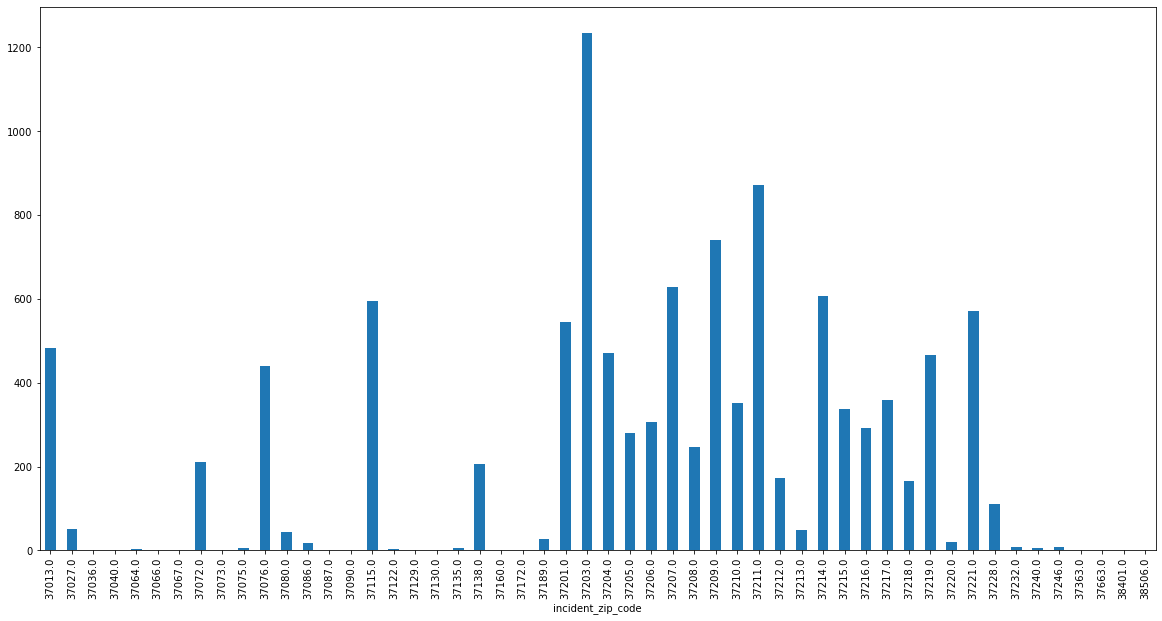

In [17]:
plt.figure(figsize=(20,10))
violations.groupby('incident_zip_code').count()['case_number'].plot(kind='bar');

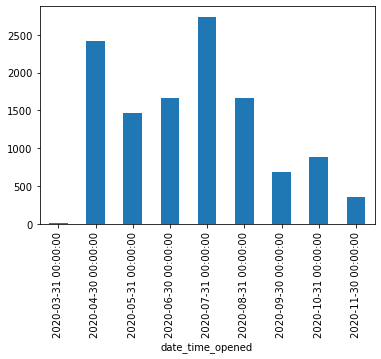

In [18]:
violations.resample('M').count()['case_number'].plot(kind='bar');

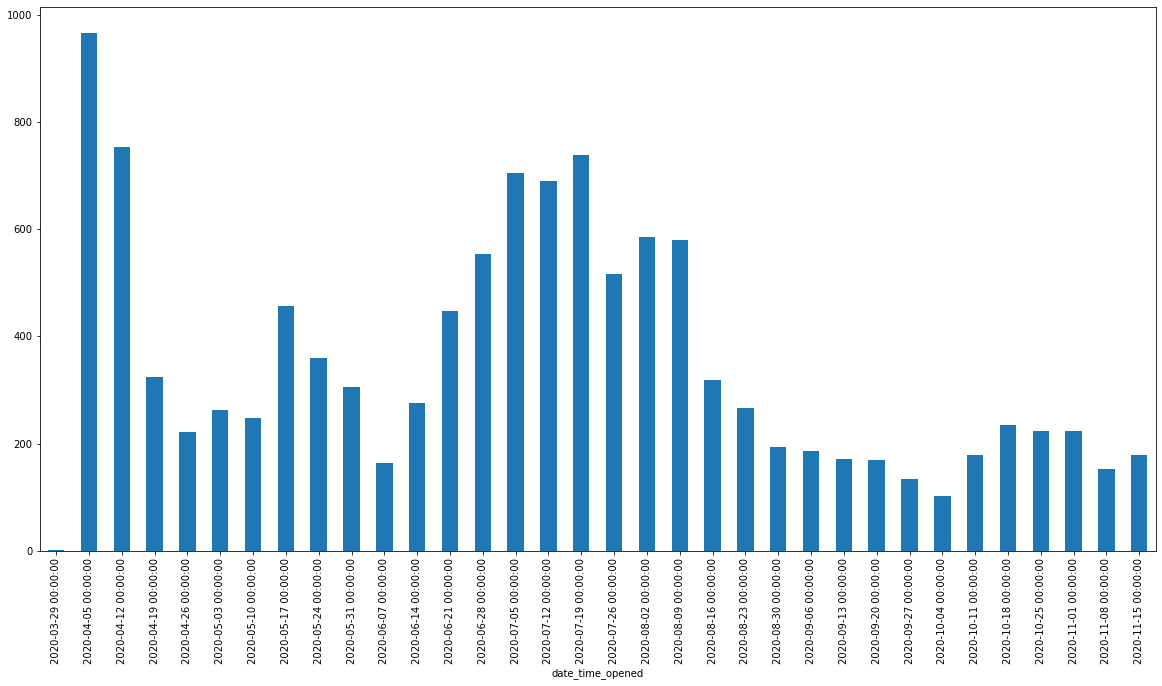

In [19]:
plt.figure(figsize=(20,10))
violations.resample('W').count()['case_number'].plot(kind='bar');

In [20]:
violations['incident_city'].unique()

array(['NASHVILLE', 'ANTIOCH', 'OLD HICKORY', nan, 'GOODLETTSVILLE',
       'MADISON', 'HERMITAGE', 'JOELTON', 'BRENTWOOD', 'WHITES CREEK',
       'LAVERGNE', 'LA VERGNE', 'Nashville', 'NOLENSVILLE'], dtype=object)

In [21]:
violations.to_csv('../data/violations.csv')